In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

In [96]:
data = pd.read_csv('/content/weatherAUS.csv')

In [97]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97502 entries, 0 to 97501
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           97502 non-null  object 
 1   Location       97501 non-null  object 
 2   MinTemp        96296 non-null  float64
 3   MaxTemp        96477 non-null  float64
 4   Rainfall       94999 non-null  float64
 5   Evaporation    53976 non-null  float64
 6   Sunshine       46952 non-null  float64
 7   WindGustDir    91037 non-null  object 
 8   WindGustSpeed  91046 non-null  float64
 9   WindDir9am     89400 non-null  object 
 10  WindDir3pm     94484 non-null  object 
 11  WindSpeed9am   96007 non-null  float64
 12  WindSpeed3pm   95398 non-null  float64
 13  Humidity9am    95418 non-null  float64
 14  Humidity3pm    94998 non-null  float64
 15  Pressure9am    86841 non-null  float64
 16  Pressure3pm    86888 non-null  float64
 17  Cloud9am       59421 non-null  float64
 18  Cloud3

In [99]:
data.isnull().sum()

Date                 0
Location             1
MinTemp           1206
MaxTemp           1025
Rainfall          2503
Evaporation      43526
Sunshine         50550
WindGustDir       6465
WindGustSpeed     6456
WindDir9am        8102
WindDir3pm        3018
WindSpeed9am      1495
WindSpeed3pm      2104
Humidity9am       2084
Humidity3pm       2504
Pressure9am      10661
Pressure3pm      10614
Cloud9am         38081
Cloud3pm         39231
Temp9am           1568
Temp3pm           2045
RainToday         2503
RainTomorrow      2501
dtype: int64

In [100]:
data.shape

(97502, 23)

In [101]:
data.dropna(subset=['RainToday','RainTomorrow'], inplace = True)

In [102]:
!pip install plotly matplotlib seaborn --quiet

In [103]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
sns.set_style('darkgrid')

In [105]:
px.histogram(data, x='Location', color='RainToday')

In [106]:
px.histogram(data, x='Temp3pm', color='RainTomorrow')

In [107]:
px.scatter(data, x='MinTemp',y='MaxTemp', color='RainToday')

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

In [110]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, y_train.shape

((65757, 22), (65757,))

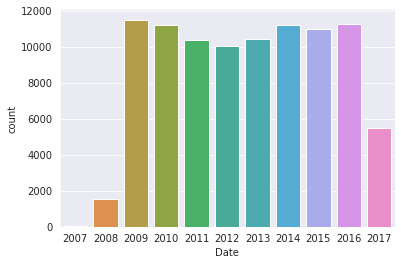

In [111]:
sns.countplot(x=pd.to_datetime(data.Date).dt.year)

In [144]:
year = pd.to_datetime(data.Date).dt.year
train_df = data[year<=2015]
test_df = data[year>2015]

In [145]:
input_col = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [146]:
train_input = train_df[input_col].copy()
train_target =  train_df[target_col].copy()
test_input = test_df[input_col].copy()
test_target =  test_df[target_col].copy()

In [147]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77242 entries, 0 to 97500
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           77242 non-null  object 
 1   Location       77242 non-null  object 
 2   MinTemp        76977 non-null  float64
 3   MaxTemp        77088 non-null  float64
 4   Rainfall       77242 non-null  float64
 5   Evaporation    46268 non-null  float64
 6   Sunshine       41444 non-null  float64
 7   WindGustDir    72453 non-null  object 
 8   WindGustSpeed  72461 non-null  float64
 9   WindDir9am     70984 non-null  object 
 10  WindDir3pm     75302 non-null  object 
 11  WindSpeed9am   76419 non-null  float64
 12  WindSpeed3pm   76114 non-null  float64
 13  Humidity9am    76371 non-null  float64
 14  Humidity3pm    76287 non-null  float64
 15  Pressure9am    69363 non-null  float64
 16  Pressure3pm    69360 non-null  float64
 17  Cloud9am       49347 non-null  float64
 18  Cloud3

In [148]:
num_cols = train_input.select_dtypes(include=np.number).columns.to_list()
cat_cols = train_input.select_dtypes(exclude=np.number).columns.to_list()

In [149]:




train_input[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,76977.000000,77088.000000,77242.000000,46268.000000,41444.000000,72461.000000,76419.000000,76114.000000,76371.000000,76287.000000,69363.000000,69360.000000,49347.000000,48566.000000,76693.000000,76571.000000
mean,11.931191,22.626453,2.532677,5.125268,7.349105,39.700446,13.743585,18.730128,70.803721,53.364164,1018.066664,1015.678283,4.512655,4.596652,16.519956,21.154991
std,6.430650,6.792294,9.191500,3.684298,3.818511,13.956308,9.215493,9.301466,17.747177,20.160127,6.942568,6.867699,2.847638,2.666183,6.385393,6.603357
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-6.200000,-5.100000
25%,7.300000,17.700000,0.000000,2.600000,4.400000,30.000000,7.000000,11.000000,59.000000,39.000000,1013.400000,1011.100000,1.000000,2.000000,11.900000,16.500000
50%,11.900000,22.400000,0.000000,4.400000,8.200000,37.000000,13.000000,19.000000,71.000000,54.000000,1018.100000,1015.600000,5.000000,5.000000,16.500000,20.900000
75%,16.900000,27.400000,0.800000,7.000000,10.400000,48.000000,19.000000,24.000000,84.000000,67.000000,1022.700000,1020.300000,7.000000,7.000000,21.300000,25.700000
max,33.900000,47.300000,371.000000,64.800000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,38.300000,46.100000


In [150]:
train_input[cat_cols].nunique()

Location       33
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [151]:
from sklearn.impute import SimpleImputer

In [152]:
imputer = SimpleImputer(strategy='mean')

In [153]:
imputer.fit(data[num_cols])

SimpleImputer()

In [154]:
train_input[num_cols] =imputer.transform(train_input[num_cols])
test_input[num_cols] =imputer.transform(test_input[num_cols]) 

In [155]:
train_input[num_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()

In [157]:
scaler.fit(data[num_cols])

MinMaxScaler()

In [158]:
print(list(scaler.data_min_))

[-8.5, -4.8, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 3.0, 1.0, 980.5, 979.0, 0.0, 0.0, -7.2, -5.4]


In [159]:
print(list(scaler.data_max_))

[33.9, 47.3, 371.0, 145.0, 14.5, 135.0, 130.0, 87.0, 100.0, 100.0, 1040.6, 1037.9, 9.0, 8.0, 38.3, 46.7]


In [160]:
train_input[num_cols] =scaler.transform(train_input[num_cols])
test_input[num_cols] =scaler.transform(test_input[num_cols]) 

In [161]:
train_input[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,77242.000000,77242.000000,77242.000000,77242.000000,77242.000000,77242.000000,77242.000000,77242.000000,77242.000000,77242.000000,77242.000000,77242.000000,77242.000000,77242.000000,77242.000000,77242.000000
mean,0.481880,0.526425,0.006827,0.035630,0.506674,0.255416,0.105716,0.215279,0.699044,0.528959,0.624911,0.622565,0.506082,0.578092,0.521334,0.509712
std,0.151406,0.130240,0.024775,0.019668,0.192898,0.105606,0.070510,0.106130,0.181926,0.202375,0.109468,0.110491,0.252974,0.264303,0.139839,0.126192
min,0.000000,0.013436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021978,0.005758
25%,0.372642,0.431862,0.000000,0.026207,0.506487,0.187500,0.053846,0.149425,0.577320,0.383838,0.559068,0.555178,0.333333,0.500000,0.419780,0.420345
50%,0.483491,0.522073,0.000000,0.036053,0.506487,0.250000,0.100000,0.214637,0.701031,0.531187,0.623514,0.621189,0.514353,0.584037,0.523077,0.506718
75%,0.599057,0.618042,0.002156,0.036053,0.593103,0.304688,0.146154,0.275862,0.835052,0.666667,0.692180,0.691002,0.777778,0.750000,0.624176,0.596929
max,1.000000,1.000000,1.000000,0.446897,1.000000,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [162]:
from sklearn.preprocessing import OneHotEncoder

In [163]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [164]:
encoder.fit(data[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [165]:
encoder.categories_

[array(['Adelaide', 'Albury', 'BadgerysCreek', 'Ballarat', 'Bendigo',
        'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour',
        'Dartmoor', 'GoldCoast', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGinini', 'Newcastle', 'Nhil',
        'NorahHead', 'NorfolkIsland', 'Penrith', 'Portland', 'Richmond',
        'Sale', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong',
        'WaggaWagga', 'Watsonia', 'Williamtown', 'Wollongong'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [166]:
encoded_cols = list(encoder.get_feature_names(cat_cols))
encoded_cols

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['Location_Adelaide',
 'Location_Albury',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_GoldCoast',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Penrith',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_WaggaWagga',
 'Location_Watsonia',
 'Location_Williamtown',
 'Location_Wollongong',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 

In [167]:
train_input[encoded_cols] =encoder.transform(train_input[cat_cols])
test_input[encoded_cols] =encoder.transform(test_input[cat_cols]) 

In [168]:
pd.set_option('display.max_columns', None)

In [169]:
test_input

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albury,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_GoldCoast,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Penrith,Location_Portland,Location_Richmond,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Wollongong,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2498,Albury,0.681604,0.813820,0.000000,0.036053,0.506487,ENE,0.367188,NaN,ESE,0.000000,0.080460,0.443299,0.161616,0.547421,0.512733,0.777778,0.375000,0.731868,0.808061,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,Albury,0.693396,0.737044,0.001078,0.036053,0.506487,SSE,0.335938,SSE,SE,0.069231,0.195402,0.525773,0.292929,0.509151,0.499151,0.888889,1.000000,0.703297,0.712092,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,Albury,0.634434,0.535509,0.005930,0.036053,0.506487,ENE,0.320312,ESE,ENE,0.084615,0.448276,0.608247,0.666667,0.557404,0.607810,0.888889,1.000000,0.637363,0.477927,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.547025,0.042049,0.036053,0.506487,SSE,0.250000,SE,SSE,0.069231,0.195402,0.731959,0.646465,0.622296,0.636672,0.888889,1.000000,0.580220,0.518234,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,Albury,0.566038,0.531670,0.018329,0.036053,0.506487,ENE,0.187500,SE,SSE,0.046154,0.103448,0.917526,0.626263,0.595674,0.592530,0.888889,1.000000,0.536264,0.529750,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0

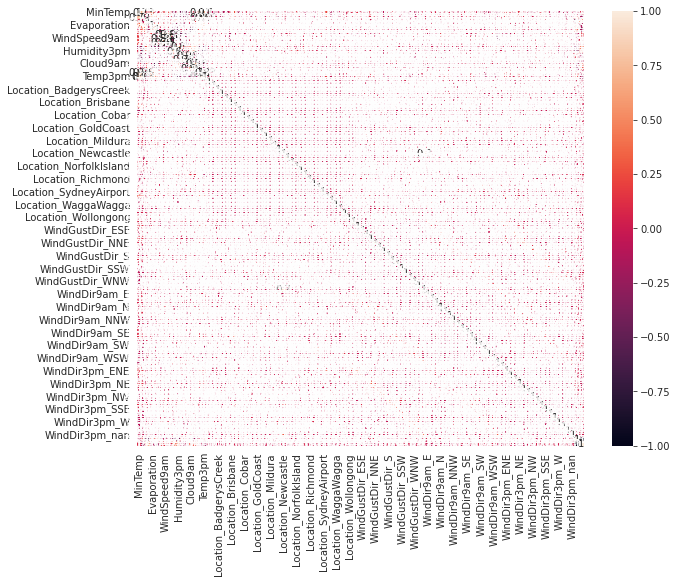

In [170]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(train_input[num_cols+encoded_cols].corr(), annot=True);

## Training Model

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
model = LogisticRegression(solver='liblinear')

In [173]:
model.fit(train_input[num_cols+encoded_cols], train_target)

LogisticRegression(solver='liblinear')

In [174]:
print(list(num_cols+encoded_cols))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albury', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_GoldCoast', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Penrith', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown', 'Location_Wollongong', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir

In [175]:
print(model.coef_.tolist())

[[0.914898188362593, -2.524605786523758, 2.5547491210335362, 1.1602338780729888, -1.5831138958462743, 6.707704014388975, -0.833968058947374, -1.4004678053742483, 0.06667407878904566, 6.373266975399539, 6.097993852680381, -8.482575129738143, -0.03589341418234504, 1.120843022367442, 0.16192751017656476, 3.099947668129943, 0.5399443075151648, 0.4890485052660581, 0.2531032250628983, -0.31049514377220916, 0.19001723227478004, 0.3442535424454041, -0.16885419442001776, 0.08461647343208738, 0.24184672708538957, -0.11472077956847149, 0.08634172235251593, -0.3551317331004616, -0.29940198095435566, -0.49147490061224985, 0.09425607556255712, -0.04414298223773144, -0.8345461651261256, -0.4208605818306857, -0.10396622980671774, -0.5625698847090086, -0.5332603739939417, 0.4753339910150214, -0.005677280211876249, 0.1803934275808462, -0.2580040553954183, -0.07137243602910802, -0.17615148697758498, -0.886079791031814, 0.37321860469447615, 0.2122799401043462, -0.21127361091111402, -0.10955605114475954, -

## Making Prediction

In [176]:
X_train = train_input[num_cols+encoded_cols]
X_test = test_input[num_cols+encoded_cols]

In [177]:
train_preds = model.predict(X_train)

In [178]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [179]:
train_probs = model.predict_proba(X_train)

In [180]:
train_probs

array([[0.95412378, 0.04587622],
       [0.94488421, 0.05511579],
       [0.96457982, 0.03542018],
       ...,
       [0.94643341, 0.05356659],
       [0.75311935, 0.24688065],
       [0.35072877, 0.64927123]])

In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [182]:
accuracy_score(train_target, train_preds)

0.8461976644830532

In [183]:
confusion_matrix(train_target, train_preds)

array([[56436,  3277],
       [ 8603,  8926]])

In [184]:
def predict_and_plot(inputs,targets,name=''):
  pred = model.predict(inputs)

  accuracy = accuracy_score(targets, pred)
  print("Accuracy : {:.2f}%".format(accuracy*100))

  cf = confusion_matrix(targets, pred, normalize='true')
  plt.figure()
  sns.heatmap(cf, annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title("{}confusion Matrix".format(name))
  return pred

Accuracy : 84.62%


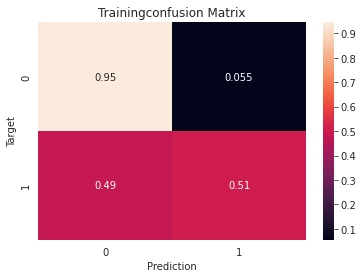

In [185]:
train_preds = predict_and_plot(X_train, train_target, 'Training')

Accuracy : 83.73%


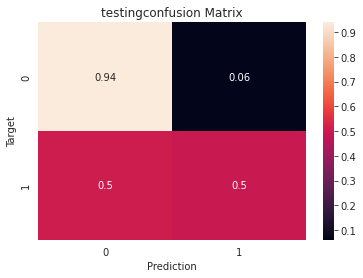

In [186]:
test_preds = predict_and_plot(X_test, test_target, 'testing')

# Feature Selection

In [187]:
from sklearn.feature_selection import mutual_info_classif

In [188]:
mutual_info = mutual_info_classif(X_train, train_target)

In [189]:
mutual_info

array([9.57076554e-03, 8.17450335e-03, 5.00805176e-02, 2.23315206e-03,
       6.00316602e-02, 2.41923983e-02, 4.84690648e-03, 5.78135770e-03,
       3.52726870e-02, 1.14505778e-01, 2.13177437e-02, 1.97150164e-02,
       3.83185180e-02, 5.89516393e-02, 1.20265356e-03, 1.34486953e-02,
       1.22031536e-03, 1.81140035e-03, 0.00000000e+00, 3.33030665e-04,
       1.49345250e-03, 1.84987509e-03, 1.59783973e-03, 4.78075166e-04,
       0.00000000e+00, 0.00000000e+00, 1.11199046e-04, 0.00000000e+00,
       7.76087123e-05, 0.00000000e+00, 1.91539857e-03, 8.85882507e-05,
       1.35290511e-03, 5.57484510e-04, 8.72532472e-04, 0.00000000e+00,
       1.75744910e-03, 0.00000000e+00, 0.00000000e+00, 3.71189766e-03,
       1.89363029e-03, 4.74870437e-04, 1.90496578e-03, 5.70217199e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.55633474e-04, 8.88896085e-04, 8.17336943e-04,
       1.07665146e-03, 0.00000000e+00, 0.00000000e+00, 9.06451534e-04,
      

In [190]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info

MinTemp           0.009571
MaxTemp           0.008175
Rainfall          0.050081
Evaporation       0.002233
Sunshine          0.060032
                    ...   
WindDir3pm_WNW    0.000000
WindDir3pm_WSW    0.000000
WindDir3pm_nan    0.002733
RainToday_No      0.048834
RainToday_Yes     0.042997
Length: 102, dtype: float64

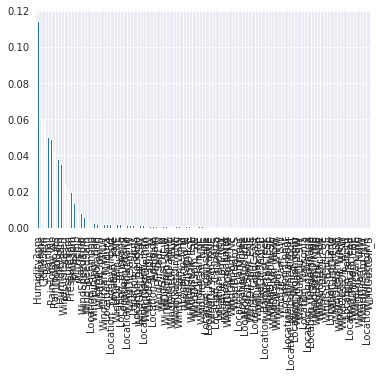

In [191]:
mutual_info.sort_values(ascending=False).plot.bar()

In [192]:
from sklearn.feature_selection import SelectKBest

In [195]:
select_k_cols = SelectKBest(mutual_info_classif, k=25)
select_k_cols.fit(X_train,train_target)

SelectKBest(k=25, score_func=<function mutual_info_classif at 0x7f8379a834d0>)

In [198]:
X_train_best_columns = X_train.columns[select_k_cols.get_support()]
X_train_best_columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp3pm', 'Location_Mildura', 'Location_Moree', 'Location_Nhil',
       'Location_Penrith', 'WindGustDir_NNE', 'WindGustDir_NW',
       'WindGustDir_W', 'WindDir3pm_W', 'RainToday_No', 'RainToday_Yes'],
      dtype='object')

In [201]:
lr = LogisticRegression(max_iter=1000)

In [202]:
lr.fit(X_train[X_train_best_columns], train_target)

LogisticRegression(max_iter=1000)

In [203]:
y_pred = lr.predict(X_test[X_train_best_columns])

In [205]:
def predict_and_plot(inputs,targets,name=''):
  pred = lr.predict(inputs)

  accuracy = accuracy_score(targets, pred)
  print("Accuracy : {:.2f}%".format(accuracy*100))

  cf = confusion_matrix(targets, pred, normalize='true')
  plt.figure()
  sns.heatmap(cf, annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title("{}confusion Matrix".format(name))
  return pred

Accuracy : 83.29%


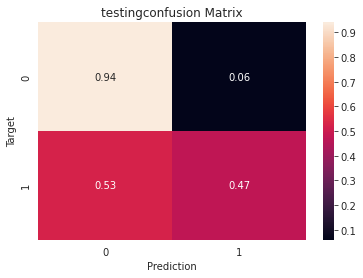

In [206]:
test_preds = predict_and_plot(X_test[X_train_best_columns], test_target, 'testing')

In [226]:
param_grid = {'penalty':['l1', 'l2'], 
               'solver':['liblinear'], 
               'max_iter':list(range(600,1000,2))}

In [221]:
from sklearn.model_selection import GridSearchCV

In [227]:
model=GridSearchCV(estimator=LogisticRegression(),
                   param_grid=param_grid, cv=2)

In [ ]:
model.fit(X_train[X_train_best_columns], train_target)

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'max_iter': [600, 602, 604, 606, 608, 610, 612, 614,
                                      616, 618, 620, 622, 624, 626, 628, 630,
                                      632, 634, 636, 638, 640, 642, 644, 646,
                                      648, 650, 652, 654, 656, 658, ...],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})